# Assignment 01: Multi-class Classification 
In this Assignment, you will train a deep model on the CIFAR10 from the scratch using PyTorch.

### Basic Imports

In [ ]:
import os
import time
import os.path as osp
import random
import numpy as np

import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.models as models
from torchvision import datasets
from torchvision import transforms
from torchvision import models
import torchvision

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

### Hyperparameters

In [ ]:
# random seed
SEED = 1 
NUM_CLASS = 10

# Training
BATCH_SIZE = 128
NUM_EPOCHS = 30
EVAL_INTERVAL=1
SAVE_DIR = './log'

# Optimizer
LEARNING_RATE = 1e-1
MOMENTUM = 0.9
STEP=5
GAMMA=0.5


### Device

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


### Dataset


In [ ]:
# cifar10 transform
transform_cifar10_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_cifar10_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_set = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=transform_cifar10_train)
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='../data', train=False,
                                       download=True, transform=transform_cifar10_test)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Model

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, 3)  
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 8, 3)  
        self.fc1 = nn.Linear(8 * 6 * 6, 32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 8 * 6 * 6)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model = ConvNet()
model.to(device)

### Optimizer

In [130]:
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP, gamma=GAMMA)

### Task 1: per batch training/testing
---

Please denfine two function named ``train_batch`` and ``test_batch``. These functions are essential for training and evaluating machine learning models using batched data from dataloaders.

**To do**: 
1. Define the loss function i.e [nn.CrossEntropyLoss()](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).
2. Take the image as the input and generate the output using the pre-defined SimpleNet.
3. Calculate the loss between the output and the corresponding label using the loss function.

In [ ]:
##################### Write your answer here ##################
# Define the loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.L1Loss()
###############################################################

In [ ]:
#MAE
def to_one_hot(target, num_classes):
    """
    Convert target to one-hot encoding.

    Args:
        target (torch.Tensor): Target tensor of shape (batch_size,).
        num_classes (int): Number of classes.

    Returns:
        torch.Tensor: One-hot encoded target of shape (batch_size, num_classes).
    """
    one_hot_target = torch.zeros(target.size(0), num_classes).to(target.device)
    one_hot_target.scatter_(1, target.unsqueeze(1), 1.)
    return one_hot_target

In [ ]:
def train_batch(model, image, target):
    """
    Perform one training batch iteration.

    Args:
        model (torch.nn.Module): The machine learning model to train.
        image (torch.Tensor): Batch of input data (images).
        target (torch.Tensor): Batch of target labels.

    Returns:
        torch.Tensor: Model output (predictions) for the batch.
        torch.Tensor: Loss value calculated by the defined loss function loss_fn().
    """
    
    ##################### Write your answer here ################## 
    output = model(image)
    one_hot_target = to_one_hot(target, NUM_CLASS)
    loss = criterion(output, one_hot_target)
    
    #output = model(image)
    
    #loss_fn =nn.CrossEntropyLoss()
    #loss_fn =ce_loss(output, target)
    #loss_fn = nn.L1Loss()
    #loss_fn =focal_loss_gamma_0_5(output, target)
    #loss_fn =focal_loss_gamma_2(output, target)
    #loss = loss_fn(output , target)
    ###############################################################

    return output, loss

In [ ]:

def test_batch(model, image, target):
    """
    Perform one testing batch iteration.

    Args:
        model (torch.nn.Module): The machine learning model to evaluate.
        image (torch.Tensor): Batch of input data (images).
        target (torch.Tensor): Batch of target labels.

    Returns:
        torch.Tensor: Model output (predictions) for the batch.
        torch.Tensor: Loss value calculated for the batch.
    """

    ##################### Write your answer here ##################
    #output = model(image)
    output = model(image)
    one_hot_target = to_one_hot(target, NUM_CLASS)
    loss = criterion(output, one_hot_target)
    #loss_fn = nn.CrossEntropyLoss()
    #loss_fn =ce_loss(output, target)
    #loss_fn = nn.L1Loss()
    #loss_fn =focal_loss_gamma_0_5(output, target)
    #loss_fn =focal_loss_gamma_2(output, target)
    #loss = loss_fn(output, target)  
    ###############################################################

    return output, loss

In [ ]:
def train_and_evaluate(learning_rate, momentum, gamma, step, EVAL_INTERVAL):
    # Define your model, optimizer, and other necessary components
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    NUM_CLASS = 10
    BATCH_SIZE = 64
    NUM_EPOCHS = 30
    SAVE_DIR = './log'
    transform_cifar10_train = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

    transform_cifar10_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

    train_set = torchvision.datasets.CIFAR10(root='../data', train=True,
                                             download=True, transform=transform_cifar10_train)

    train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE,
                                                   shuffle=True, num_workers=2)

    test_set = torchvision.datasets.CIFAR10(root='../data', train=False,
                                            download=True, transform=transform_cifar10_test)

    test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE,
                                                  shuffle=False, num_workers=2)


    model = models.resnet18(weights=None)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, NUM_CLASS)
    model.to(device)

    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step, gamma=gamma)

### Model Training

In [ ]:
training_loss = []
training_acc = []
testing_loss = []
testing_acc = []

for epoch in range(NUM_EPOCHS):
    model.train()
    torch.cuda.empty_cache()

    ##########################
    ### Training
    ##########################

    running_cls_loss = 0.0
    running_cls_corrects = 0

    for batch_idx, (image, target) in enumerate(train_dataloader):

        image = image.to(device)
        target = target.to(device)
       # model = model.to(device)

        # train model
        outputs, loss = train_batch(model, image, target)
        _, preds = torch.max(outputs, 1)

        
        loss_data = loss.data.item()
        if np.isnan(loss_data):
            raise ValueError('loss is nan while training')
        running_cls_loss += loss.item()
        running_cls_corrects += torch.sum(preds == target.data)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    epoch_loss = running_cls_loss / len(train_set)
    epoch_acc = running_cls_corrects.double() / len(train_set)

    print(f'Epoch: {epoch+1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    training_loss.append(epoch_loss)
    training_acc.append(epoch_acc.cpu().detach().numpy())

    # change learning rate
    scheduler.step()


    ##########################
    ### Testing
    ##########################
    # # eval model during training or in the last epoch
    if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch +1) == NUM_EPOCHS:
        print('Begin test......')
        model.eval()
    
        val_loss = 0.0
        val_corrects = 0

        for batch_idx, (image, target) in enumerate(test_dataloader):

            image = image.to(device)
            target = target.to(device)

            # test model
            outputs, loss = test_batch(model, image, target)
            _, preds = torch.max(outputs, 1)
            
            val_loss += loss.item()
            val_corrects += torch.sum(preds == target.data)

        val_loss = val_loss / len(test_set)
        val_acc = val_corrects.double() / len(test_set)
        print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
        testing_loss.append(val_loss)
        testing_acc.append(val_acc.cpu().detach().numpy())

        # save the model in last epoch
        if (epoch +1) == NUM_EPOCHS:
            
            state = {
            'state_dict': model.state_dict(),
            'acc': epoch_acc,
            'epoch': (epoch+1),
            }

            # check the dir
            if not os.path.exists(SAVE_DIR):
                os.makedirs(SAVE_DIR)

            # save the state
            torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch+1))))

In [ ]:
process_data = {
        'Epoch': list(range(1, NUM_EPOCHS + 1)),
        'Train Loss': training_loss,
        'Train Accuracy': training_acc,
        'Test Loss': testing_loss,
        'Test Accuracy': testing_acc,
}
plt.figure(figsize=(12, 6))
plt.plot(process_data['Epoch'], process_data['Train Loss'], label='Train Loss', marker='o')
plt.plot(process_data['Epoch'], process_data['Test Loss'], label='Test Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss')
plt.grid(True)
plt.savefig('loss_plot.png')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(process_data['Epoch'], process_data['Train Accuracy'], label='Train Accuracy', marker='o')
plt.plot(process_data['Epoch'], process_data['Test Accuracy'], label='Test Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy')
plt.grid(True)
plt.savefig('accuracy_plot.png')
plt.show()
def train_and_evaluate(learning_rate, momentum, gamma, step, EVAL_INTERVAL):
    # 在这里定义 train_and_evaluate 函数，包含你的训练和评估逻辑
    # 返回训练好的模型
    model = models.resnet18(weights=None)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, NUM_CLASS)
    return model
if __name__ == '__main__':

    learning_rate = 0.1
    momentum = 0.5
    step = 5
    gamma = 0.9
    EVAL_INTERVAL = 1
    results = []

    SEED = 1
    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)

    result = train_and_evaluate(learning_rate, momentum, gamma, step, EVAL_INTERVAL)


### Task 2: Instance inference
---
The task is to visualizes an image along with model prediction and class probabilities.

**To do**: 
1. Calculate the prediction and the probabilities for each class.
         

In [137]:
def train_batch(model, image, target):
    # Perform one training batch iteration.
    output = model(image)
    loss_fn = nn.CrossEntropyLoss()
    loss = loss_fn(output, target)
    return output, loss


def test_batch(model, image, target):
    # Perform one testing batch iteration.
    output = model(image)
    loss_fn = nn.CrossEntropyLoss()
    loss = loss_fn(output, target)
    return output, loss


def train_and_evaluate(learning_rate, momentum, gamma, step, EVAL_INTERVAL):
    # Define your model, optimizer, and other necessary components
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    NUM_CLASS = 10
    BATCH_SIZE = 64
    NUM_EPOCHS = 30
    SAVE_DIR = './log'
    transform_cifar10_train = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

    transform_cifar10_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

    train_set = torchvision.datasets.CIFAR10(root='../data', train=True,
                                             download=True, transform=transform_cifar10_train)

    train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE,
                                                   shuffle=True, num_workers=2)

    test_set = torchvision.datasets.CIFAR10(root='../data', train=False,
                                            download=True, transform=transform_cifar10_test)

    test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE,
                                                  shuffle=False, num_workers=2)
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    model = models.resnet18(weights='imagenet')
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, NUM_CLASS)
    model.to(device)

    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step, gamma=gamma)

    for epoch in range(NUM_EPOCHS):
        model.train()
        torch.cuda.empty_cache()
        running_cls_loss = 0.0
        running_cls_corrects = 0

        for batch_idx, (image, target) in enumerate(train_dataloader):
            image = image.to(device)
            target = target.to(device)

            outputs, loss = train_batch(model, image, target)
            _, preds = torch.max(outputs, 1)

            loss_data = loss.data.item()
            if np.isnan(loss_data):
                raise ValueError('loss is nan while training')
            running_cls_loss += loss.item()
            running_cls_corrects += torch.sum(preds == target.data)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        epoch_loss = running_cls_loss / len(train_set)
        epoch_acc = running_cls_corrects.double() / len(train_set)
        print(f'Epoch: {epoch + 1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        scheduler.step()

        if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch + 1) == NUM_EPOCHS:
            print('Begin test...')
            model.eval()
            val_loss = 0.0
            val_corrects = 0

            for batch_idx, (image, target) in enumerate(test_dataloader):
                image = image.to(device)
                target = target.to(device)

                outputs, loss = test_batch(model, image, target)
                _, preds = torch.max(outputs, 1)

                val_loss += loss.item()
                val_corrects += torch.sum(preds == target.data)

            val_loss = val_loss / len(test_set)
            val_acc = val_corrects.double() / len(test_set)
            print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

            if (epoch + 1) == NUM_EPOCHS:

                state = {
                    'state_dict': model.state_dict(),
                    'acc': epoch_acc,
                    'epoch': (epoch + 1),
                }

                if not os.path.exists(SAVE_DIR):
                    os.makedirs(SAVE_DIR)

                torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch + 1))))

In [138]:
inputs, classes = next(iter(test_dataloader))
inputs = inputs.to(device)
input = inputs[0]
input = input.to(device)

In [139]:
##################### Write your answer here ##################
# input: image, model
# outputs: predict_label, probabilities
# predict_label is the index (or label) of the class with the highest probability from the probabilities.
###############################################################
with torch.no_grad():
        model.eval()
        output = model(input.unsqueeze(0))
        probabilities = torch.softmax(output, dim=1)
        predict_label = torch.argmax(probabilities, dim=1).item()
#probabilities = torch.softmax(output, dim=1)
#predict_label = torch.argmax(probabilities, dim=1)

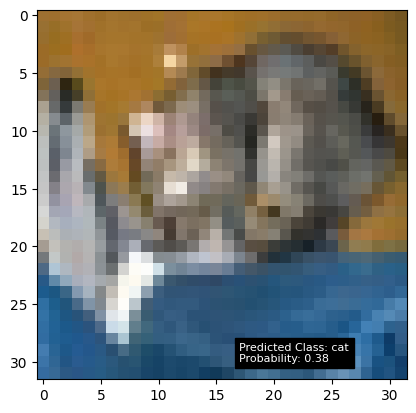

Print probabilities for each class:
airplane: 0.0036
automobile: 0.0053
bird: 0.0715
cat: 0.3815
deer: 0.0413
dog: 0.1183
frog: 0.3264
horse: 0.0252
ship: 0.0219
truck: 0.0050


In [140]:
predicted_class = class_names[predict_label]
predicted_probability = probabilities[0, predict_label].item()
image = input.cpu().numpy().transpose((1, 2, 0))
image = (image * np.array([0.2023, 0.1994, 0.2010])) + np.array([0.4914, 0.4822, 0.4465])
image = np.clip(image, 0, 1)
image = Image.fromarray((image * 255).astype(np.uint8))
plt.imshow(image)
plt.text(17, 30, f'Predicted Class: {predicted_class}\nProbability: {predicted_probability:.2f}', 
            color='white', backgroundcolor='black', fontsize=8)
plt.show()

# Print probabilities for each class
print('Print probabilities for each class:')
for i in range(len(class_names)):
    print(f'{class_names[i]}: {probabilities[0,i].item():.4f}')
def train_and_evaluate(learning_rate, momentum, gamma, step, EVAL_INTERVAL):
    # 在这里定义 train_and_evaluate 函数，包含你的训练和评估逻辑
    # 返回训练好的模型
    model = models.resnet18(pretrained=False)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, NUM_CLASS)
    
    return model
if __name__ == '__main__':

    learning_rate = 0.1
    momentum = 0.5
    step = 5
    gamma = 0.9
    EVAL_INTERVAL = 30
    results = []

    SEED = 1
    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)

    result = train_and_evaluate(learning_rate, momentum, gamma, step, EVAL_INTERVAL)